In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_train=pd.read_csv('/Users/sumedhapooonia/Desktop/jigsaw-toxic-comment-classification-challenge/train.csv')

In [3]:
raw_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
raw_train.shape

(159571, 8)

In [5]:
raw_test=pd.read_csv('/Users/sumedhapooonia/Desktop/jigsaw-toxic-comment-classification-challenge/test.csv')

In [6]:
raw_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
print(raw_train.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [8]:
sums=raw_train.iloc[:,2:].sum(axis=1)
cc=(sums==0).sum(axis=0)
t=raw_train.shape[0]
print('Total Comments = ', t)
print('Toxic Comments = ', t-cc)
print('Clean Comments = ', cc)
print('Percentage of Toxic Comments = ', ((t-cc)/t)*100 )

Total Comments =  159571
Toxic Comments =  16225
Clean Comments =  143346
Percentage of Toxic Comments =  10.167887648758233


In [9]:
cat=list(raw_train.columns.values)
cat=cat[2:]
print(cat)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [10]:
count=[]
for i in cat:
    count.append((i, raw_train[i].sum()))
counts=pd.DataFrame(count, columns=['Category', 'Number of Comments'])
print(counts)

        Category  Number of Comments
0          toxic               15294
1   severe_toxic                1595
2        obscene                8449
3         threat                 478
4         insult                7877
5  identity_hate                1405


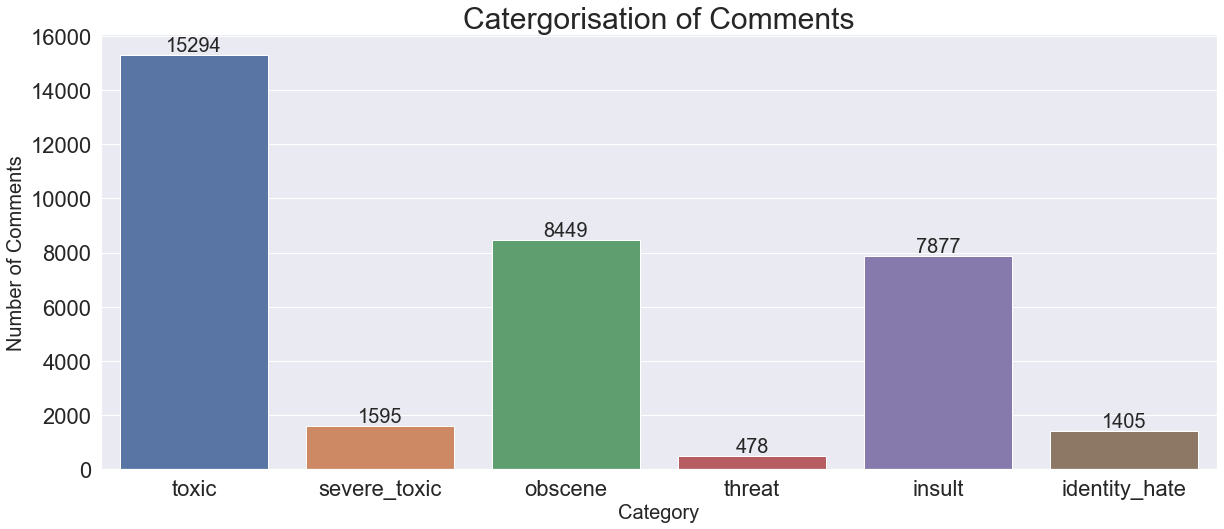

In [11]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 8))
ax=sns.barplot(x=cat, y=raw_train.iloc[:,2:].sum().values)
plt.title('Catergorisation of Comments', fontsize=30)
plt.ylabel('Number of Comments', fontsize=20)
plt.xlabel('Category', fontsize=20)
rec=ax.patches
lab=raw_train.iloc[:,2:].sum().values
for rect, label in zip(rec, lab):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=20)
plt.show()

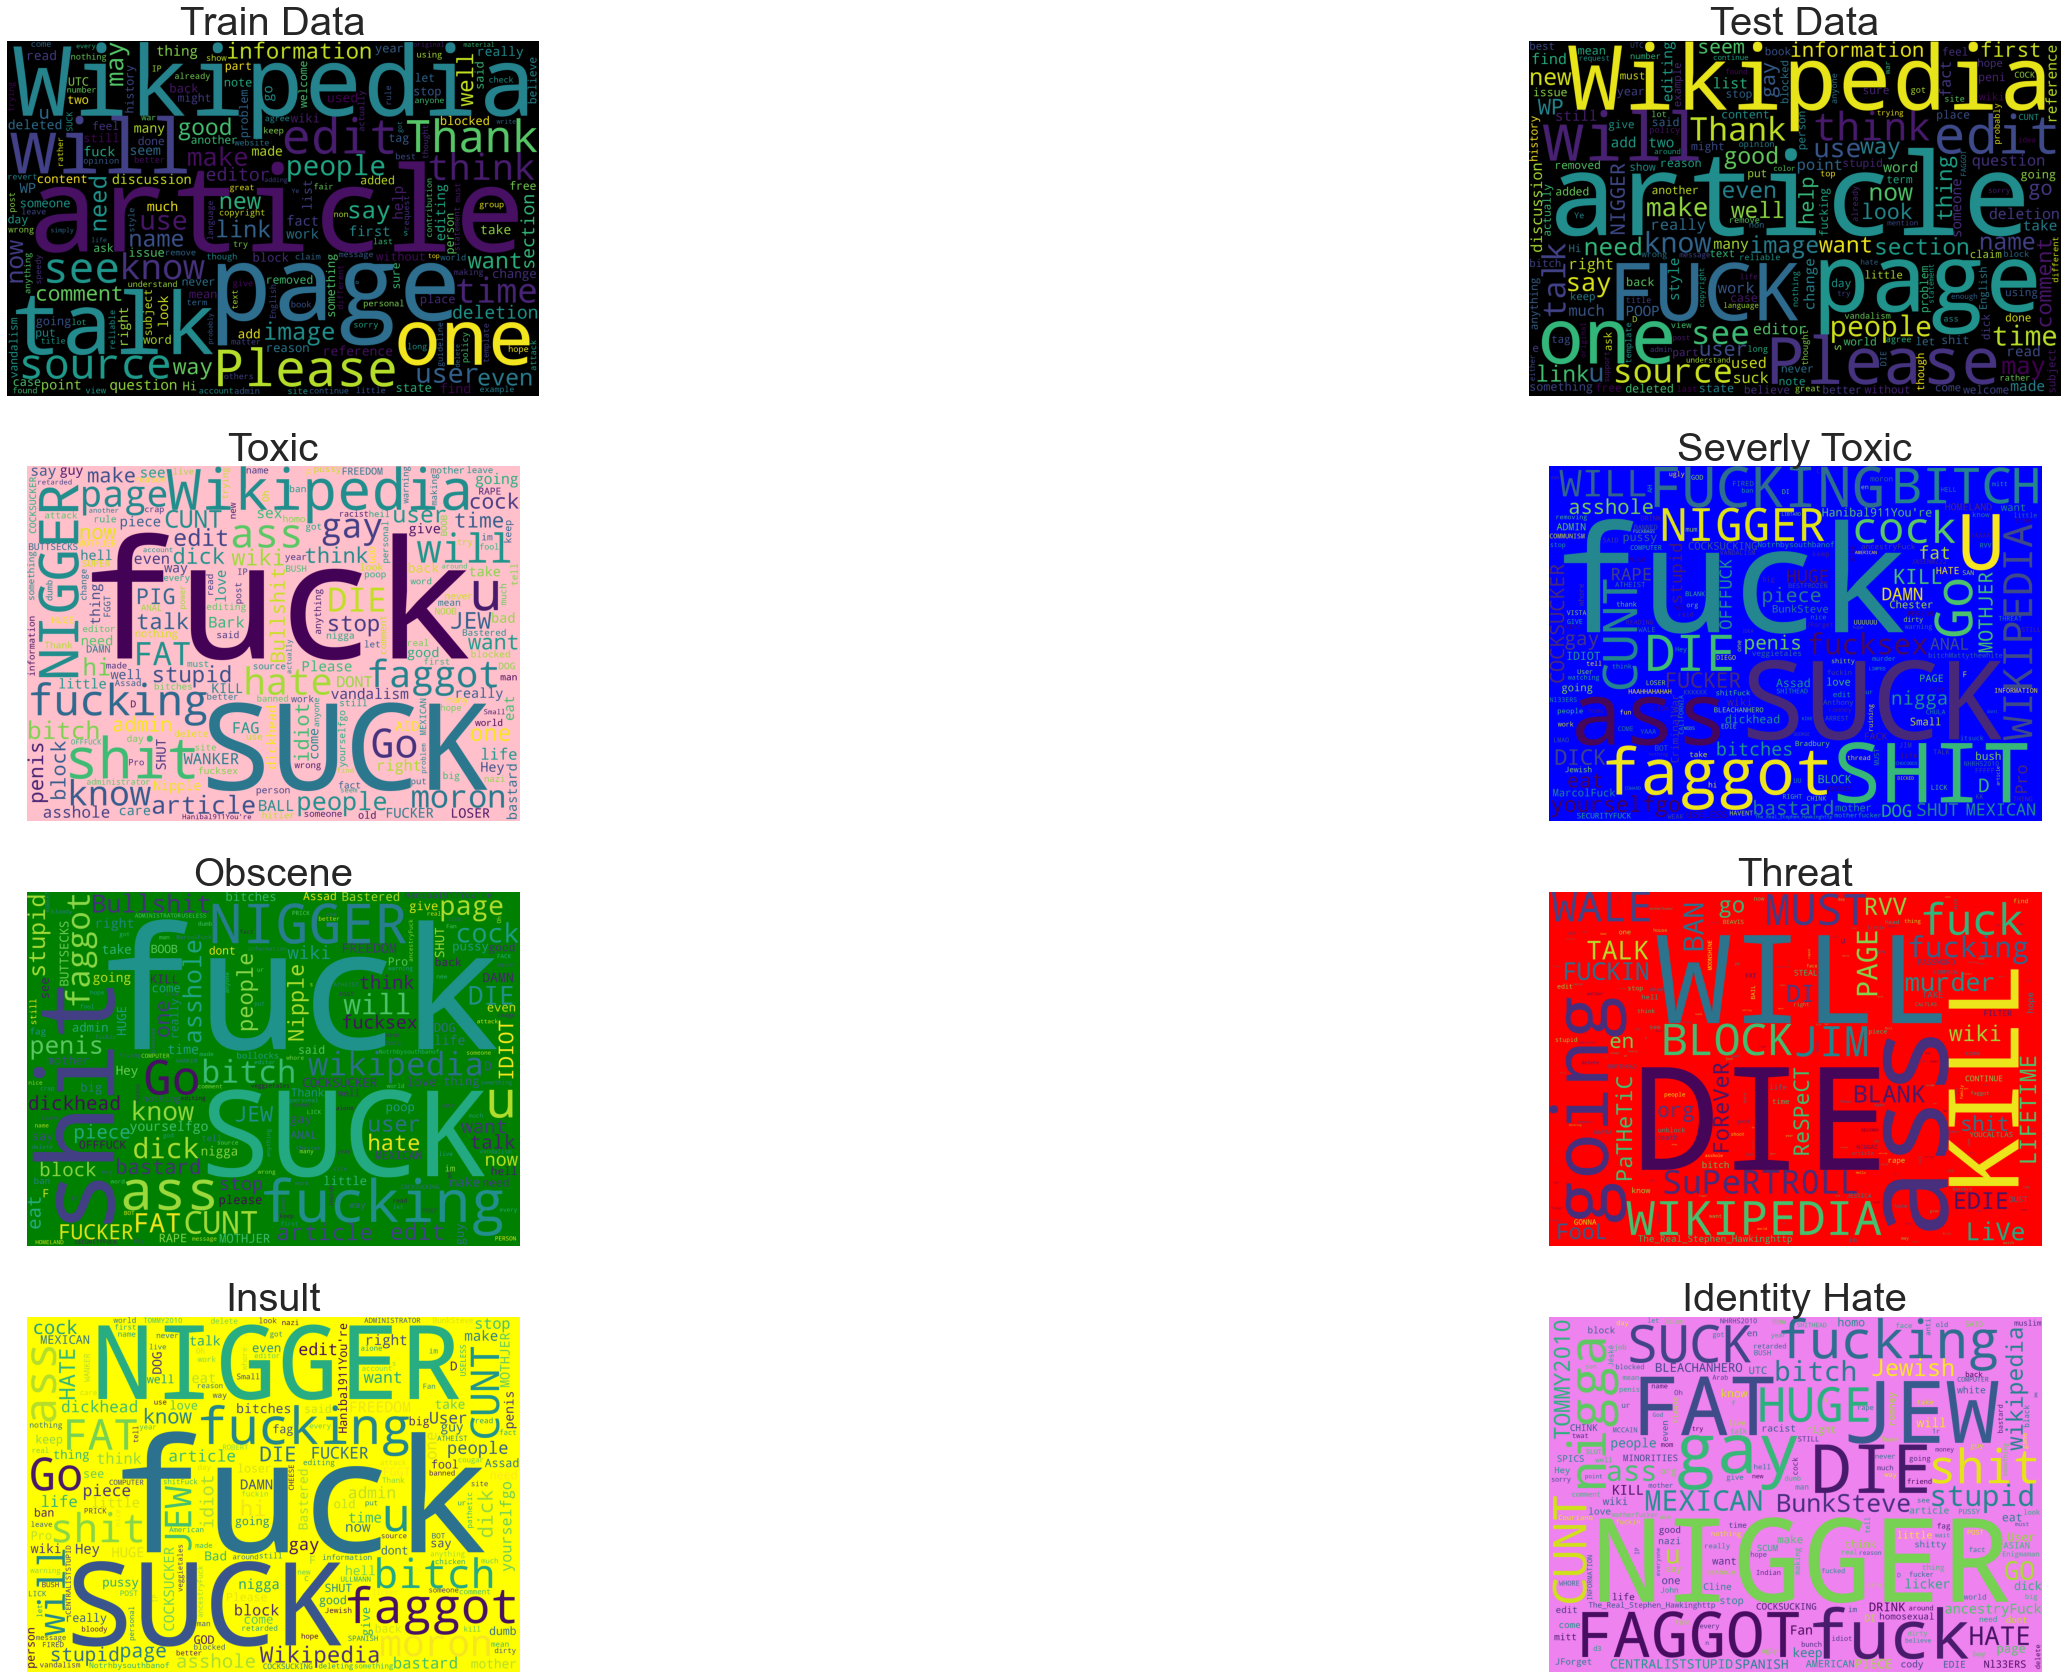

In [12]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(50, 30))

#trainset
subset=raw_train[:]
text=subset.comment_text.values
cloud_raw_train = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=3000,
                          height=2000
                         ).generate(" ".join(text))

plt.subplot(4, 2, 1)
plt.axis('off')
plt.title("Train Data",fontsize=40)
plt.imshow(cloud_raw_train)

#testset
subset=raw_test[:]
text=subset.comment_text.values
cloud_raw_test = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=3000,
                          height=2000
                         ).generate(" ".join(text))

plt.subplot(4, 2, 2)
plt.axis('off')
plt.title("Test Data",fontsize=40)
plt.imshow(cloud_raw_test)

#toxic
subset=raw_train[raw_train.toxic==1]
text=subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='pink',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(4, 2, 3)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)

#severe toxic
subset=raw_train[raw_train.severe_toxic==1]
text=subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='blue',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(4, 2, 4)
plt.axis('off')
plt.title("Severly Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)

#obscene
subset=raw_train[raw_train.obscene==1]
text=subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='green',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(4, 2, 5)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)

#threat
subset=raw_train[raw_train.threat==1]
text=subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='red',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(4, 2, 6)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)

#insult
subset=raw_train[raw_train.insult==1]
text=subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='yellow',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(4, 2, 7)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)

#identity hate
subset=raw_train[raw_train.identity_hate==1]
text=subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='violet',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(4, 2, 8)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

In [13]:
data=raw_train
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sumedhapooonia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def clean(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [16]:
data['comment_text'] = data['comment_text'].map(lambda com : (com))

In [17]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [18]:
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\n edits made username Hardcore ...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww! matches background colour seemingly ...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, really trying edit war. guy ...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\n make real suggestions improvement - ...",0,0,0,0,0,0
4,0001d958c54c6e35,"sir, hero. chance remember page",0,0,0,0,0,0


In [19]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww! match background colour seem stuck thanks...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, realli tri edit war. guy constant rem...",0,0,0,0,0,0
3,0001b41b1c6bb37e,""" make real suggest improv - wonder section st...",0,0,0,0,0,0
4,0001d958c54c6e35,"sir, hero. chanc rememb page",0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(data, random_state=42, test_size=0.2, shuffle=True)
print(train.shape)
print(test.shape)

(127656, 8)
(31915, 8)


In [21]:
train_text = train['comment_text']
test_text = test['comment_text']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vect.fit(train_text)
vect.fit(test_text)
x_train = vect.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vect.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [ ]:
#multiple binary classifications
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
classifier = BinaryRelevance(GaussianNB())
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

In [ ]:
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")